In [1]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 51.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=ad04cdec2d1759ccaa860d5b3c4b78a1a495d30184e167e666fd247a82cd16cc
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [1]:
import pyspark

In [2]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [3]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [4]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2022-03-05 16:38:30--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/claimed/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2022-03-05 16:38:30--  https://github.com/IBM/claimed/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/claimed/raw/master/coursera_ds/washing.parquet [following]
--2022-03-05 16:38:30--  https://github.com/IBM/claimed/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/claimed/master/coursera_ds/washing.parquet [following]
--2022-03-05 16:38:30

In [6]:
df=spark.read.parquet('washing.parquet')

In [8]:
type(df)

pyspark.sql.dataframe.DataFrame

In [10]:
df.createOrReplaceTempView("washing")

In [11]:
spark.sql("SELECT * FROM washing").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [26]:
df.dtypes

[('_id', 'string'),
 ('_rev', 'string'),
 ('count', 'bigint'),
 ('flowrate', 'bigint'),
 ('fluidlevel', 'string'),
 ('frequency', 'bigint'),
 ('hardness', 'bigint'),
 ('speed', 'bigint'),
 ('temperature', 'bigint'),
 ('ts', 'bigint'),
 ('voltage', 'bigint')]

result = spark.sql("select voltage from washing where voltage is not null")

In [12]:
result = spark.sql("select voltage from washing where voltage is not null")

In [13]:
type(result)

pyspark.sql.dataframe.DataFrame

**GETTING A RANDOM SAMPLE OF THE CREATED RDD**

In [21]:
result_array = result.rdd.map(lambda row : row.voltage).sample(False,0.98).collect()

In [22]:
print(result_array)

[236, 235, 236, 233, 235, 220, 225, 239, 230, 236, 244, 235, 234, 224, 225, 223, 236, 226, 227, 237, 233, 226, 222, 228, 228, 232, 225, 229, 224, 235, 233, 226, 239, 238, 222, 226, 236, 230, 235, 237, 225, 228, 221, 232, 221, 230, 231, 220, 235, 223, 231, 231, 236, 229, 248, 223, 222, 238, 235, 234, 228, 233, 229, 221, 223, 235, 220, 232, 226, 239, 229, 229, 232, 220, 227, 244, 232, 228, 229, 225, 227, 230, 221, 221, 238, 235, 229, 222, 226, 237, 222, 235, 237, 228, 231, 237, 237, 236, 224, 231, 231, 234, 231, 234, 238, 225, 224, 229, 222, 239, 221, 236, 227, 228, 222, 234, 222, 235, 224, 238, 234, 234, 250, 224, 227, 232, 220, 228, 224, 227, 231, 225, 231, 237, 228, 244, 236, 224, 230, 239, 229, 221, 235, 233, 239, 221, 248, 226, 233, 234, 238, 221, 225, 220, 223, 223, 226, 232, 242, 221, 232, 229, 232, 224, 229, 224, 233, 223, 225, 231, 237, 220, 221, 227, 220, 236, 234, 221, 231, 232, 237, 250, 240, 223, 225, 223, 225, 222, 231, 231, 239, 247, 230, 223, 230, 226, 221, 227, 226, 237,

In [23]:
result_array[:15]

[236, 235, 236, 233, 235, 220, 225, 239, 230, 236, 244, 235, 234, 224, 225]

**LET US ANALYZE HOW VOLTAGE VARIES WITH TIME**

In [27]:
result = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()

In [37]:
print(result_array_ts[:15])
print(result_array_voltage[:15])

[1547808734922, 1547808812970, 1547808885074, 1547808930101, 1547808933120, 1547808951131, 1547809020199, 1547809053217, 1547809056219, 1547809080236, 1547809092245, 1547809107251, 1547809122262, 1547809158278, 1547809176311]
[234, 227, 226, 238, 228, 238, 221, 226, 226, 235, 227, 220, 235, 226, 224]


In [39]:
import matplotlib.pyplot as plt


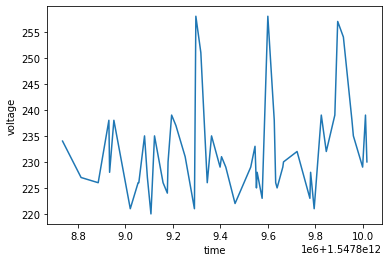

In [40]:
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [41]:
result_df = spark.sql(
"""select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null""")

In [42]:
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()

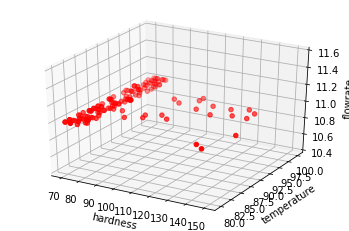

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

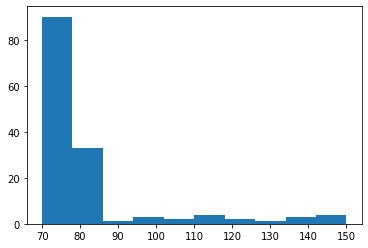

In [44]:
plt.hist(result_array_hardness)
plt.show()

In [46]:
result = spark.sql("""
SELECT * from (
    SELECT
    min(temperature) over w as min_temperature,
    max(temperature) over w as max_temperature, 
    min(voltage) over w as min_voltage,
    max(voltage) over w as max_voltage,
    min(flowrate) over w as min_flowrate,
    max(flowrate) over w as max_flowrate,
    min(frequency) over w as min_frequency,
    max(frequency) over w as max_frequency,
    min(hardness) over w as min_hardness,
    max(hardness) over w as max_hardness,
    min(speed) over w as min_speed,
    max(speed) over w as max_speed
    FROM washing 
    WINDOW w AS (ORDER BY ts ROWS BETWEEN CURRENT ROW AND 10 FOLLOWING) 
)
WHERE min_temperature is not null 
AND max_temperature is not null
AND min_voltage is not null
AND max_voltage is not null
AND min_flowrate is not null
AND max_flowrate is not null
AND min_frequency is not null
AND max_frequency is not null
AND min_hardness is not null
AND min_speed is not null
AND max_speed is not null   
""")

In [49]:
result.show()

+---------------+---------------+-----------+-----------+------------+------------+-------------+-------------+------------+------------+---------+---------+
|min_temperature|max_temperature|min_voltage|max_voltage|min_flowrate|max_flowrate|min_frequency|max_frequency|min_hardness|max_hardness|min_speed|max_speed|
+---------------+---------------+-----------+-----------+------------+------------+-------------+-------------+------------+------------+---------+---------+
|             81|            100|        221|        223|          11|          11|           68|           76|          71|          78|     1033|     1033|
|             81|            100|        221|        223|          11|          11|           68|           76|          72|          78|     1033|     1033|
|             81|            100|        221|        223|          11|          11|           68|           76|          72|          80|     1033|     1033|
|             81|            100|        222|       

In [50]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

**In each row, the values of the input columns will be concatenated into a vector in the specified order.**

In [51]:
assembler = VectorAssembler(inputCols=result.columns, outputCol="features")

In [55]:
features = assembler.transform(result)

In [57]:
features.show()

+---------------+---------------+-----------+-----------+------------+------------+-------------+-------------+------------+------------+---------+---------+--------------------+
|min_temperature|max_temperature|min_voltage|max_voltage|min_flowrate|max_flowrate|min_frequency|max_frequency|min_hardness|max_hardness|min_speed|max_speed|            features|
+---------------+---------------+-----------+-----------+------------+------------+-------------+-------------+------------+------------+---------+---------+--------------------+
|             81|            100|        221|        223|          11|          11|           68|           76|          71|          78|     1033|     1033|[81.0,100.0,221.0...|
|             81|            100|        221|        223|          11|          11|           68|           76|          72|          78|     1033|     1033|[81.0,100.0,221.0...|
|             81|            100|        221|        223|          11|          11|           68|        

In [58]:
features.rdd.map(lambda r: r.features).take(10)

[DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 72.0, 80.0, 1033.0, 1046.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0])]

**REDUCING DIMENSION OF THE DATA WITH PCA**

In [59]:
pca = PCA(k = 3, inputCol='features', outputCol = 'pcafeatures')
model = pca.fit(features)

In [60]:
result_pca = model.transform(features).select('pcaFeatures')
result_pca.show(truncate=False)

+----------------------------------------------------------+
|pcaFeatures                                               |
+----------------------------------------------------------+
|[1459.9789705815301,18.745237781813703,70.7843079478946]  |
|[1459.9954818287874,19.113431461685497,70.72738871418585] |
|[1460.0895843562396,20.969471062955694,70.75630600314628] |
|[1469.69939294206,20.40312464764779,62.01356967480217]    |
|[1469.7159041893176,20.771318327519584,61.95665044109353] |
|[1469.712831733977,20.790751117254793,61.89610667824968]  |
|[1478.353026457406,20.29455702976173,71.67550104802774]   |
|[1478.353026457406,20.29455702976173,71.67550104802774]   |
|[1478.3686036139297,20.26062689766929,71.63355353599673]  |
|[1478.3686036139297,20.26062689766929,71.63355353599673]  |
|[1483.5412027685188,20.006222577534132,66.82710394276808] |
|[1483.5171090224458,20.86702042161668,66.86707301946444]  |
|[1483.422426854405,19.87574823668772,66.93027077907936]   |
|[1483.422426854405,19.8

In [61]:
rdd = result_pca.rdd.sample(False, 0.8)

In [62]:
x = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[0]).collect()

In [63]:
y = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[1]).collect()

In [64]:
z = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[2]).collect()

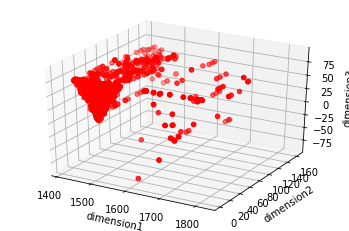

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('dimension1')
ax.set_ylabel('dimension2')
ax.set_zlabel('dimension3')

plt.show()